# Team A: Group photo

![A group of people standing and sitting around a dining table.](https://github.com/uol-mediaprocessing/notebooks/raw/master/pictures/image10.jpeg)

## Team members

* Tobias Bossert
* Kersten Coldewey
* David Neugebauer

## Objective

Purpose of this project is to create software which merges photographs of groups to ensure as many subjects as possible look directly at the camera with open eyes and a smile.

To achieve this the application has to:

* recognize faces
* evaluate faces according to a number of fixed criteria
  * person is smiling
  * eyes are open
  * looking at the camera
  * face is not obstructed
  * ...
* respect which face belongs to whose head and body
* pick the optimal picture of each persons face from all sources
* merge several pictures into one
  * compensate for small movements of both people and the camera to avoid artifacts

## Milestones

1. detecting faces ✔️
2. landmark detection ✔️
3. seperating the face from the background cleanly
  * calculating average skin color
  * build a mask / outline
3. evaluation of smile and eyes
  * aspect ratio of the eyes
4. identifiying the same people in multiple photos, picking the best face
5. merging

## Picture Scenarios

4 - 5 people

### Background

* calm, monotone
* busy, whiteboard or projected image
* busy, outside, in front of OFFIS

### Group

* Everyone is smiling (perfect picture)
* Everyone looks away
* No one smiles
* 2 - 3 people are looking slightly away
* 2 - 3 people are not smiling
* 1 - 2 faces are partially hidden
* some faces are slightly tilted

## Potential resources

* [Facial landmark detection](https://www.pyimagesearch.com/2017/04/10/detect-eyes-nose-lips-jaw-dlib-opencv-python/)
* [Image Transformation utilizing OpenCV](https://docs.opencv.org/3.4.6/da/d6e/tutorial_py_geometric_transformations.html)
* [Deep Learning: OpenCV Face Recognition](https://www.pyimagesearch.com/2018/09/24/opencv-face-recognition/#attachment_8761)
* [Seamless cloning](https://www.learnopencv.com/seamless-cloning-using-opencv-python-cpp/)
* [HELEN 194 point model](http://www.ifp.illinois.edu/~vuongle2/helen/)


In [0]:
#!/usr/bin/python
# The contents of this file are in the public domain. See LICENSE_FOR_EXAMPLE_PROGRAMS.txt
# SOURCE: http://dlib.net/face_detector.py.html
#
#   This example program shows how to find frontal human faces in an image.  In
#   particular, it shows how you can take a list of images from the command
#   line and display each on the screen with red boxes overlaid on each human
#   face.
#
#   This face detector is made using the now classic Histogram of Oriented
#   Gradients (HOG) feature combined with a linear classifier, an image
#   pyramid, and sliding window detection scheme.  This type of object detector
#   is fairly general and capable of detecting many types of semi-rigid objects
#   in addition to human faces.  Therefore, if you are interested in making
#   your own object detectors then read the train_object_detector.py example
#   program.  
#
# COMPILING/INSTALLING THE DLIB PYTHON INTERFACE
#   You can install dlib using the command:
#       pip install dlib
#
#   Alternatively, if you want to compile dlib yourself then go into the dlib
#   root folder and run:
#       python setup.py install
#
#   Compiling dlib should work on any operating system so long as you have
#   CMake installed.  On Ubuntu, this can be done easily by running the
#   command:
#       sudo apt-get install cmake
#
#   Also note that this example requires Numpy which can be installed
#   via the command:
#       pip install numpy

import dlib
import io

# SOURCE: https://gist.github.com/kylemcdonald/2f1b9a255993bf9b2629
import PIL
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

def renderFace(img, d):
    showarray(img[d.top():d.bottom(), d.left():d.right()])

detector = dlib.get_frontal_face_detector()
f = "image10.jpeg"
print("Processing file: {}".format(f))
img = dlib.load_rgb_image(f)

# The 1 in the second argument indicates that we should upsample the image
# 1 time.  This will make everything bigger and allow us to detect more
# faces.
dets = detector(img, 1)
print("Number of faces detected: {}".format(len(dets)))
for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        i, d.left(), d.top(), d.right(), d.bottom()))
    renderFace(img, d)

# Finally, if you really want to you can ask the detector to tell you the score
# for each detection.  The score is bigger for more confident detections.
# The third argument to run is an optional adjustment to the detection threshold,
# where a negative value will return more detections and a positive value fewer.
# Also, the idx tells you which of the face sub-detectors matched.  This can be
# used to broadly identify faces in different orientations.
img = dlib.load_rgb_image(f)
dets, scores, idx = detector.run(img, 1, -1)
for i, d in enumerate(dets):
    print("Detection {}, score: {}, face_type:{}".format(
        d, scores[i], idx[i]))
    renderFace(img, d)

In [0]:
import sys

import dlib
import cv2
from google.colab.patches import cv2_imshow

detector = dlib.get_frontal_face_detector()

imgCV = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/image10.jpeg')
img = dlib.load_rgb_image('/content/gdrive/My Drive/Colab Notebooks/image10.jpeg')
# The 1 in the second argument indicates that we should upsample the image
# 1 time.  This will make everything bigger and allow us to detect more
# faces.
dets = detector(img, 1)
  
print("Number of faces detected: {}".format(len(dets)))
for i, d in enumerate(dets):
    cv2.rectangle(imgCV,(d.left(),d.top()),(d.right(),d.bottom()),(255,0,0),2)
    #cv2.circle(imgCV,d.left(),2,(255,0,0))
cv2_imshow(imgCV)
    


In [0]:
import cv2
from google.colab.patches import cv2_imshow

# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/gdrive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/gdrive/My Drive/Colab Notebooks/haarcascade_eye.xml')
# Read the input image
img = cv2.imread('/content/gdrive/My Drive/Colab Notebooks/123.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray,1.7,3)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
# Display the output
cv2_imshow(img)
cv2.waitKey()

# Face landmark detection

To evaluate the fitness for the group photo we need to identify the most important features of any face.

A 68-point model does this for us.

In [0]:
# initializing everything
!pip install cmake
!pip install numpy opencv-python dlib imutils

In [0]:
#getting all the data
!wget -q  https://github.com/uol-mediaprocessing/group-projects-group-photo/raw/master/shape_predictor_68_face_landmarks.dat.bz2 -O shape_predictor_68_face_landmarks.dat.bz2
!ls -l
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
!ls -l

In [0]:
import cv2
import dlib
from google.colab.patches import cv2_imshow

# set up the 68 point facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [0]:
# bring in the input image
!wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-group-photo/master/pictures/group_1/IMG_20191112_110956.jpg
!ls -l 
img = cv2.imread('IMG_20191112_110956.jpg', 1)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces in the image
faces_in_image = detector(img_gray, 0)

In [0]:

# loop through each face in image
for face in faces_in_image:

	# assign the facial landmarks
	landmarks = predictor(img_gray, face)

	# unpack the 68 landmark coordinates from the dlib object into a list 
	landmarks_list = []
	for i in range(0, landmarks.num_parts):
		landmarks_list.append((landmarks.part(i).x, landmarks.part(i).y))

	# for each landmark, plot and write number
	for landmark_num, xy in enumerate(landmarks_list, start = 1):
		cv2.circle(img, (xy[0], xy[1]), 1, (168, 0, 20), -1) 
		

# visualise the image with landmarks
cv2_imshow(img)
#cv2.waitKey(0)
cv2.destroyAllWindows()

# Face swapping

_source_: [GitHub: wuhuikai/FaceSwap](https://github.com/wuhuikai/FaceSwap)

1. cut out face by selecting jaw and eyebrow landmarks
  1. inner pixels set to white
  2. maybe erode mask a little to avoid placing things outside the face
2. warp landmarks to match target face
  * not entirely applicable to us, we already selected the best available face
3. color correction and bluring the edges

## Challenges

### Head tracking (coming later)

### Background restoration

We might want to handle head movements. This might require restoring the background where the head covered it.

1. Create a face mask for the source image.
2. Compute new repair mask for this face: `src & not dst`
  * Problem: masks might have different dimensions!
3. Merge all repair masks
4. apply background restoration

Slightly better:

1. Create a face mask for the source image
2. merge source mask into the source mask for the entire picture
3. merge destination mask into the destination mask for the enire picture
4. compute repair mask: `src & not dst`
5. apply background restoration


## Face swap example


### Initialization


In [8]:
!rm -rf ./*
!ls -l

total 0


In [9]:
#getting all the data
!wget -q  https://github.com/uol-mediaprocessing/group-projects-group-photo/raw/master/shape_predictor_68_face_landmarks.dat.bz2 -O shape_predictor_68_face_landmarks.dat.bz2
!ls -l
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
!ls -l

total 62540
-rw-r--r-- 1 root root 64040097 Nov 28 11:57 shape_predictor_68_face_landmarks.dat.bz2
total 97360
-rw-r--r-- 1 root root 99693937 Nov 28 11:57 shape_predictor_68_face_landmarks.dat


In [10]:
!wget https://github.com/wuhuikai/FaceSwap/raw/master/imgs/test6.jpg
!wget https://github.com/wuhuikai/FaceSwap/raw/master/imgs/test7.jpg

--2019-11-28 11:57:27--  https://github.com/wuhuikai/FaceSwap/raw/master/imgs/test6.jpg
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wuhuikai/FaceSwap/master/imgs/test6.jpg [following]
--2019-11-28 11:57:27--  https://raw.githubusercontent.com/wuhuikai/FaceSwap/master/imgs/test6.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462025 (451K) [image/jpeg]
Saving to: ‘test6.jpg’

test6.jpg           100%[===================>] 451.20K  --.-KB/s    in 0.04s   

2019-11-28 11:57:27 (11.7 MB/s) - ‘test6.jpg’ saved [462025/462025]

--2019-11-28 11:57:29--  https://github.com/wuhuikai/FaceSwap/raw/m

In [11]:
# initializing everything
!pip install cmake numpy opencv-python dlib imutils

### Function definitions


In [0]:
import cv2
import numpy as np
import scipy.spatial as spatial
import logging


## 3D Transform
def bilinear_interpolate(img, coords):
    """ Interpolates over every image channel
    http://en.wikipedia.org/wiki/Bilinear_interpolation
    :param img: max 3 channel image
    :param coords: 2 x _m_ array. 1st row = xcoords, 2nd row = ycoords
    :returns: array of interpolated pixels with same shape as coords
    """
    int_coords = np.int32(coords)
    x0, y0 = int_coords
    dx, dy = coords - int_coords

    # 4 Neighour pixels
    q11 = img[y0, x0]
    q21 = img[y0, x0 + 1]
    q12 = img[y0 + 1, x0]
    q22 = img[y0 + 1, x0 + 1]

    btm = q21.T * dx + q11.T * (1 - dx)
    top = q22.T * dx + q12.T * (1 - dx)
    inter_pixel = top * dy + btm * (1 - dy)

    return inter_pixel.T

def grid_coordinates(points):
    """ x,y grid coordinates within the ROI of supplied points
    :param points: points to generate grid coordinates
    :returns: array of (x, y) coordinates
    """
    xmin = np.min(points[:, 0])
    xmax = np.max(points[:, 0]) + 1
    ymin = np.min(points[:, 1])
    ymax = np.max(points[:, 1]) + 1

    return np.asarray([(x, y) for y in range(ymin, ymax)
                       for x in range(xmin, xmax)], np.uint32)


def process_warp(src_img, result_img, tri_affines, dst_points, delaunay):
    """
    Warp each triangle from the src_image only within the
    ROI of the destination image (points in dst_points).
    """
    roi_coords = grid_coordinates(dst_points)
    # indices to vertices. -1 if pixel is not in any triangle
    roi_tri_indices = delaunay.find_simplex(roi_coords)

    for simplex_index in range(len(delaunay.simplices)):
        coords = roi_coords[roi_tri_indices == simplex_index]
        num_coords = len(coords)
        out_coords = np.dot(tri_affines[simplex_index],
                            np.vstack((coords.T, np.ones(num_coords))))
        x, y = coords.T
        result_img[y, x] = bilinear_interpolate(src_img, out_coords)

    return None


def triangular_affine_matrices(vertices, src_points, dst_points):
    """
    Calculate the affine transformation matrix for each
    triangle (x,y) vertex from dst_points to src_points
    :param vertices: array of triplet indices to corners of triangle
    :param src_points: array of [x, y] points to landmarks for source image
    :param dst_points: array of [x, y] points to landmarks for destination image
    :returns: 2 x 3 affine matrix transformation for a triangle
    """
    ones = [1, 1, 1]
    for tri_indices in vertices:
        src_tri = np.vstack((src_points[tri_indices, :].T, ones))
        dst_tri = np.vstack((dst_points[tri_indices, :].T, ones))
        mat = np.dot(src_tri, np.linalg.inv(dst_tri))[:2, :]
        yield mat


def warp_image_3d(src_img, src_points, dst_points, dst_shape, dtype=np.uint8):
    rows, cols = dst_shape[:2]
    result_img = np.zeros((rows, cols, 3), dtype=dtype)

    delaunay = spatial.Delaunay(dst_points)
    tri_affines = np.asarray(list(triangular_affine_matrices(
        delaunay.simplices, src_points, dst_points)))

    process_warp(src_img, result_img, tri_affines, dst_points, delaunay)

    return result_img


## 2D Transform
def transformation_from_points(points1, points2):
    points1 = points1.astype(np.float64)
    points2 = points2.astype(np.float64)

    c1 = np.mean(points1, axis=0)
    c2 = np.mean(points2, axis=0)
    points1 -= c1
    points2 -= c2

    s1 = np.std(points1)
    s2 = np.std(points2)
    points1 /= s1
    points2 /= s2

    U, S, Vt = np.linalg.svd(np.dot(points1.T, points2))
    R = (np.dot(U, Vt)).T

    return np.vstack([np.hstack([s2 / s1 * R,
                                (c2.T - np.dot(s2 / s1 * R, c1.T))[:, np.newaxis]]),
                      np.array([[0., 0., 1.]])])


def warp_image_2d(im, M, dshape):
    output_im = np.zeros(dshape, dtype=im.dtype)
    cv2.warpAffine(im,
                   M[:2],
                   (dshape[1], dshape[0]),
                   dst=output_im,
                   borderMode=cv2.BORDER_TRANSPARENT,
                   flags=cv2.WARP_INVERSE_MAP)

    return output_im


## Generate Mask
def mask_from_points(size, points,erode_flag=1):
    radius = 10  # kernel size
    kernel = np.ones((radius, radius), np.uint8)

    mask = np.zeros(size, np.uint8)
    cv2.fillConvexPoly(mask, cv2.convexHull(points), 255)
    print('mask')
    cv2_imshow(mask)
    if erode_flag:
        mask = cv2.erode(mask, kernel,iterations=1)
        print('eroded mask')
        cv2_imshow(mask)

    return mask


## Color Correction
def correct_colours(im1, im2, landmarks1):
    COLOUR_CORRECT_BLUR_FRAC = 0.75
    LEFT_EYE_POINTS = list(range(42, 48))
    RIGHT_EYE_POINTS = list(range(36, 42))
    print('correct_colours: \n')
    blur_amount = COLOUR_CORRECT_BLUR_FRAC * np.linalg.norm(
                              np.mean(landmarks1[LEFT_EYE_POINTS], axis=0) -
                              np.mean(landmarks1[RIGHT_EYE_POINTS], axis=0))
    blur_amount = int(blur_amount)
    
    # kernel doesn't have center.
    if blur_amount % 2 == 0:
        blur_amount += 1
    
    print('blured')
    im1_blur = cv2.GaussianBlur(im1, (blur_amount, blur_amount), 0)
    cv2_imshow(im1_blur)
    im2_blur = cv2.GaussianBlur(im2, (blur_amount, blur_amount), 0)
    cv2_imshow(im2_blur)

    print('as int')
    # Avoid divide-by-zero errors.
    im2_blur = im2_blur.astype(int)
    cv2_imshow(im2_blur)
    im2_blur += 128*(im2_blur <= 1)
    cv2_imshow(im2_blur)

    print('results')
    result = im2.astype(np.float64) * im1_blur.astype(np.float64) / im2_blur.astype(np.float64)
    print('result as float64')
    cv2_imshow(result)
    result = np.clip(result, 0, 255).astype(np.uint8)

    return result


## Copy-and-paste
def apply_mask(img, mask):
    """ Apply mask to supplied image
    :param img: max 3 channel image
    :param mask: [0-255] values in mask
    :returns: new image with mask applied
    """
    masked_img=cv2.bitwise_and(img,img,mask=mask)

    return masked_img


## Alpha blending
def alpha_feathering(src_img, dest_img, img_mask, blur_radius=15):
    mask = cv2.blur(img_mask, (blur_radius, blur_radius))
    mask = mask / 255.0

    result_img = np.empty(src_img.shape, np.uint8)
    for i in range(3):
        result_img[..., i] = src_img[..., i] * mask + dest_img[..., i] * (1-mask)

    return result_img


def check_points(img,points):
    # Todo: I just consider one situation.
    if points[8,1]>img.shape[0]:
        logging.error("Jaw part out of image")
    else:
        return True
    return False

# Can be optimized by giving the face instead of the whole picture
def select_face(im, a, r=10):
    img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    faces = detector(img_gray, 0)

    if len(faces) == 0:
      print('Detect 0 Faces !!!')
      
    if len(faces) == 1:
      bbox = faces[0]
    else:
      bbox = []
      im_copy = im.copy()
      for face in faces:
          # draw the face bounding box
          cv2.rectangle(im_copy, (face.left(), face.top()), (face.right(), face.bottom()), (0, 0, 255), 1)
      #bbox = bbox[0]

    # Always takes first face found in picture!!
    landmarks = predictor(img_gray, faces[a])
    points = np.asarray(list([p.x, p.y] for p in landmarks.parts()), dtype=np.int)

    im_w, im_h = im.shape[:2]
    left, top = np.min(points, 0)
    right, bottom = np.max(points, 0)

    x, y = max(0, left-r), max(0, top-r)
    w, h = min(right+r, im_h)-x, min(bottom+r, im_w)-y

    return points - np.asarray([[x, y]]), (x, y, w, h), im[y:y+h, x:x+w]

In [3]:
import cv2
import dlib
from google.colab.patches import cv2_imshow
!wget -q  https://github.com/uol-mediaprocessing/group-projects-group-photo/raw/master/shape_predictor_68_face_landmarks.dat.bz2 -O shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
# set up the 68 point facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


### Main script


In [6]:
!wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-group-photo/master/pictures/group_1/IMG_20191112_110956.jpg

src_img = cv2.imread('IMG_20191112_110956.jpg', 1)

img_gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
faces = detector(img_gray, 0)

if len(faces) == 0:
  print('Detect 0 Faces !!!')
      
if len(faces) == 1:
  bbox = faces[0]
else:
  bbox = []
  im_copy = src_img.copy()
  for face in faces:
      # draw the face bounding box
      cv2.rectangle(im_copy, (face.left(), face.top()), (face.right(), face.bottom()), (0, 0, 255), 1)
  bbox = bbox[0]

# Always takes first face found in picture!!
landmarks = predictor(img_gray, faces[0])
points = np.asarray(list([p.x, p.y] for p in landmarks.parts()), dtype=np.int)

im_w, im_h = im.shape[:2]
left, top = np.min(points, 0)
right, bottom = np.max(points, 0)

x, y = max(0, left-r), max(0, top-r)
w, h = min(right+r, im_h)-x, min(bottom+r, im_w)-y

a = points - np.asarray([[x, y]])
b = (x, y, w, h)
c = points - np.asarray([[x, y]])

IndexError: ignored

(1523, 1494, 188, 189)
mask


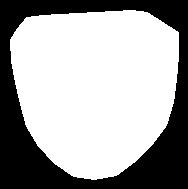

eroded mask


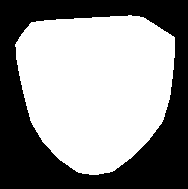

correct_colours: 

blured


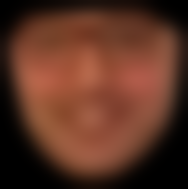

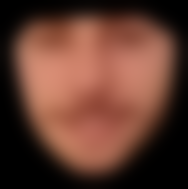

as int


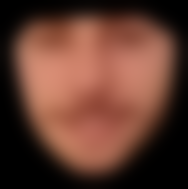

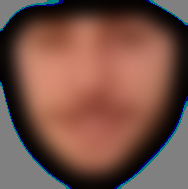

results
result as float64


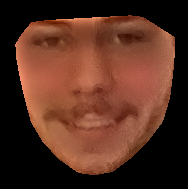

mask


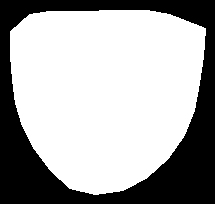

eroded mask


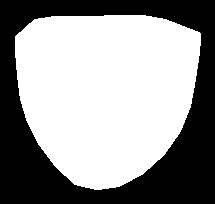

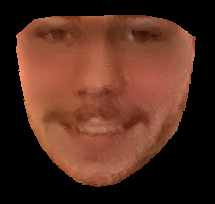

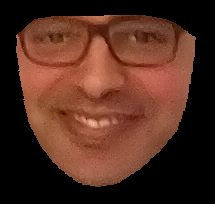

correct_colours: 

blured


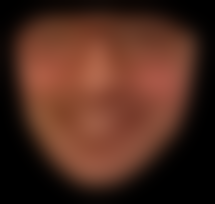

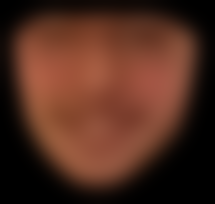

as int


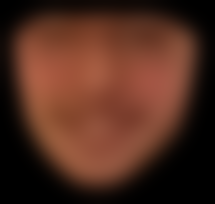

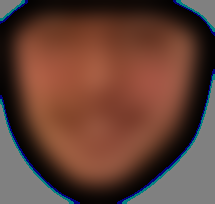

results
result as float64


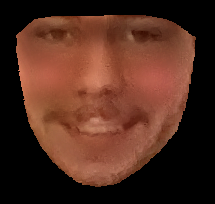

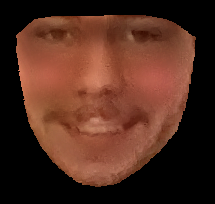

ValueError: ignored

In [20]:
# Read images
!wget -q https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-group-photo/master/pictures/group_1/IMG_20191112_110956.jpg
src_img = cv2.imread('IMG_20191112_110956.jpg', 1)
dst_img = cv2.imread('test7.jpg', 1)

# Select src face
src_points, src_shape, src_face = select_face(src_img,0)
print(src_shape)
# Select dst face
dst_points, dst_shape, dst_face = select_face(src_img,1)

h, w = dst_face.shape[:2]

### Warp Image
#if not args.warp_2d:
    ## 3d warp
  #   warped_src_face = warp_image_3d(src_face, src_points[:48], dst_points[:48], (h, w))
#else:
  ## 2d warp

src_mask = mask_from_points(src_face.shape[:2], src_points)
src_face = apply_mask(src_face, src_mask)

# Correct Color for 2d warp
warped_dst_img = warp_image_3d(dst_face, dst_points[:48], src_points[:48], src_face.shape[:2])
src_face = correct_colours(warped_dst_img, src_face, src_points)

# Warp
warped_src_face = warp_image_2d(src_face, transformation_from_points(dst_points, src_points), (h, w, 3))

## Mask for blending
mask = mask_from_points((h, w), dst_points)
mask_src = np.mean(warped_src_face, axis=2) > 0
mask = np.asarray(mask*mask_src, dtype=np.uint8)

## Correct color
warped_src_face = apply_mask(warped_src_face, mask)
cv2_imshow(warped_src_face)
dst_face_masked = apply_mask(dst_face, mask)
cv2_imshow(dst_face_masked)
warped_src_face = correct_colours(dst_face_masked, warped_src_face, dst_points)
cv2_imshow(warped_src_face)

## Shrink the mask
kernel = np.ones((10, 10), np.uint8)
mask = cv2.erode(mask, kernel, iterations=1)

##Poisson Blending
r = cv2.boundingRect(mask)
center = ((r[0] + int(r[2] / 2), r[1] + int(r[3] / 2)))
output = cv2.seamlessClone(warped_src_face, dst_face, mask, center, cv2.NORMAL_CLONE)

x, y, w, h = dst_shape
dst_img_cp = dst_img.copy()
dst_img_cp[y:y+h, x:x+w] = output
output = dst_img_cp

##For debug
cv2_imshow(src_img)
cv2_imshow(dst_img)
cv2_imshow(output)
